In [3]:
import pandas as pd # Dataframe, series
import numpy as np # scientific computing package

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import seaborn as sns

import graphviz
import io
import pydotplus
from scipy import misc
import scipy

%matplotlib inline

## retouched by

# abhishek1141781_gunner1141781

## Spotify Song Attributes EDA 
- Import Dataset
- EDA to visualize data and observe structure
- train a classifier (Decision Tree)
- Predict target using the trained classifier

In [4]:
data = pd.read_csv('D:\A7_Courses_Done_Certified\Machine learning\Spotify\part_1_Spotify_EDA_data.csv')

# "D:\A7_Courses_Done_Certified\Machine learning\Spotify\" this part of the code depends 
# upon the location of your data file which you'll downloading from kaggle as seen from wes doyle video on youtube
# here I've renamed it "part_1_Spotify_EDA_data.csv"


In [3]:
data.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [4]:
data.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4,0.904,1,Parallel Lines,Junior Boys


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   int64  
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [6]:
train,test = train_test_split(data, test_size = 0.15)

In [7]:
print("Training size: {}; Test size: {}".format(len(train),len(test)))

Training size: 1714; Test size: 303


In [8]:
#custom color palatte
red_blue = ['#B42033', '#3C3B6E']
palette = sns.color_palette(red_blue)
sns.set_palette(palette)
sns.set_style('white')

In [9]:
pos_tempo = data[data['target'] == 1] ['tempo']
neg_tempo = data[data['target'] == 0] ['tempo']

In [10]:
pos_acousticness = data[data['target'] == 1] ['acousticness']
neg_acousticness = data[data['target'] == 0] ['acousticness']

pos_danceability = data[data['target'] == 1] ['danceability']
neg_danceability = data[data['target'] == 0] ['danceability']

pos_duration_ms = data[data['target'] == 1] ['duration_ms']
neg_duration_ms = data[data['target'] == 0] ['duration_ms']

pos_energy = data[data['target'] == 1] ['energy']
neg_energy = data[data['target'] == 0] ['energy']

pos_instrumentalness = data[data['target'] == 1] ['instrumentalness']
neg_instrumentalness = data[data['target'] == 0] ['instrumentalness']

pos_key = data[data['target'] == 1] ['key']
neg_key = data[data['target'] == 0] ['key']

pos_speechiness = data[data['target'] == 1] ['speechiness']
neg_speechiness = data[data['target'] == 0] ['speechiness']

pos_valence = data[data['target'] == 1] ['valence']
neg_valence = data[data['target'] == 0] ['valence']

pos_loudness = data[data['target'] == 1] ['loudness']
neg_loudness = data[data['target'] == 0] ['loudness']

pos_liveness = data[data['target'] == 1] ['liveness']
neg_liveness = data[data['target'] == 0] ['liveness']

pos_mode = data[data['target'] == 1] ['mode']
neg_mode = data[data['target'] == 0] ['mode']

pos_time_signature = data[data['target'] == 1] ['time_signature']
neg_time_signature = data[data['target'] == 0] ['time_signature']

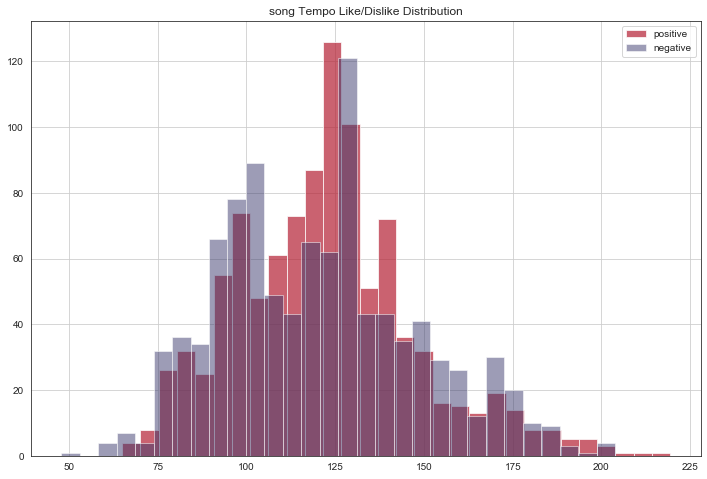

In [11]:
fig = plt.figure(figsize=(12,8))
plt.title("song Tempo Like/Dislike Distribution")
pos_tempo.hist(alpha = 0.7, bins = 30, label='positive')
neg_tempo.hist(alpha = 0.5, bins = 30, label='negative')
plt.legend(loc = "upper right")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the

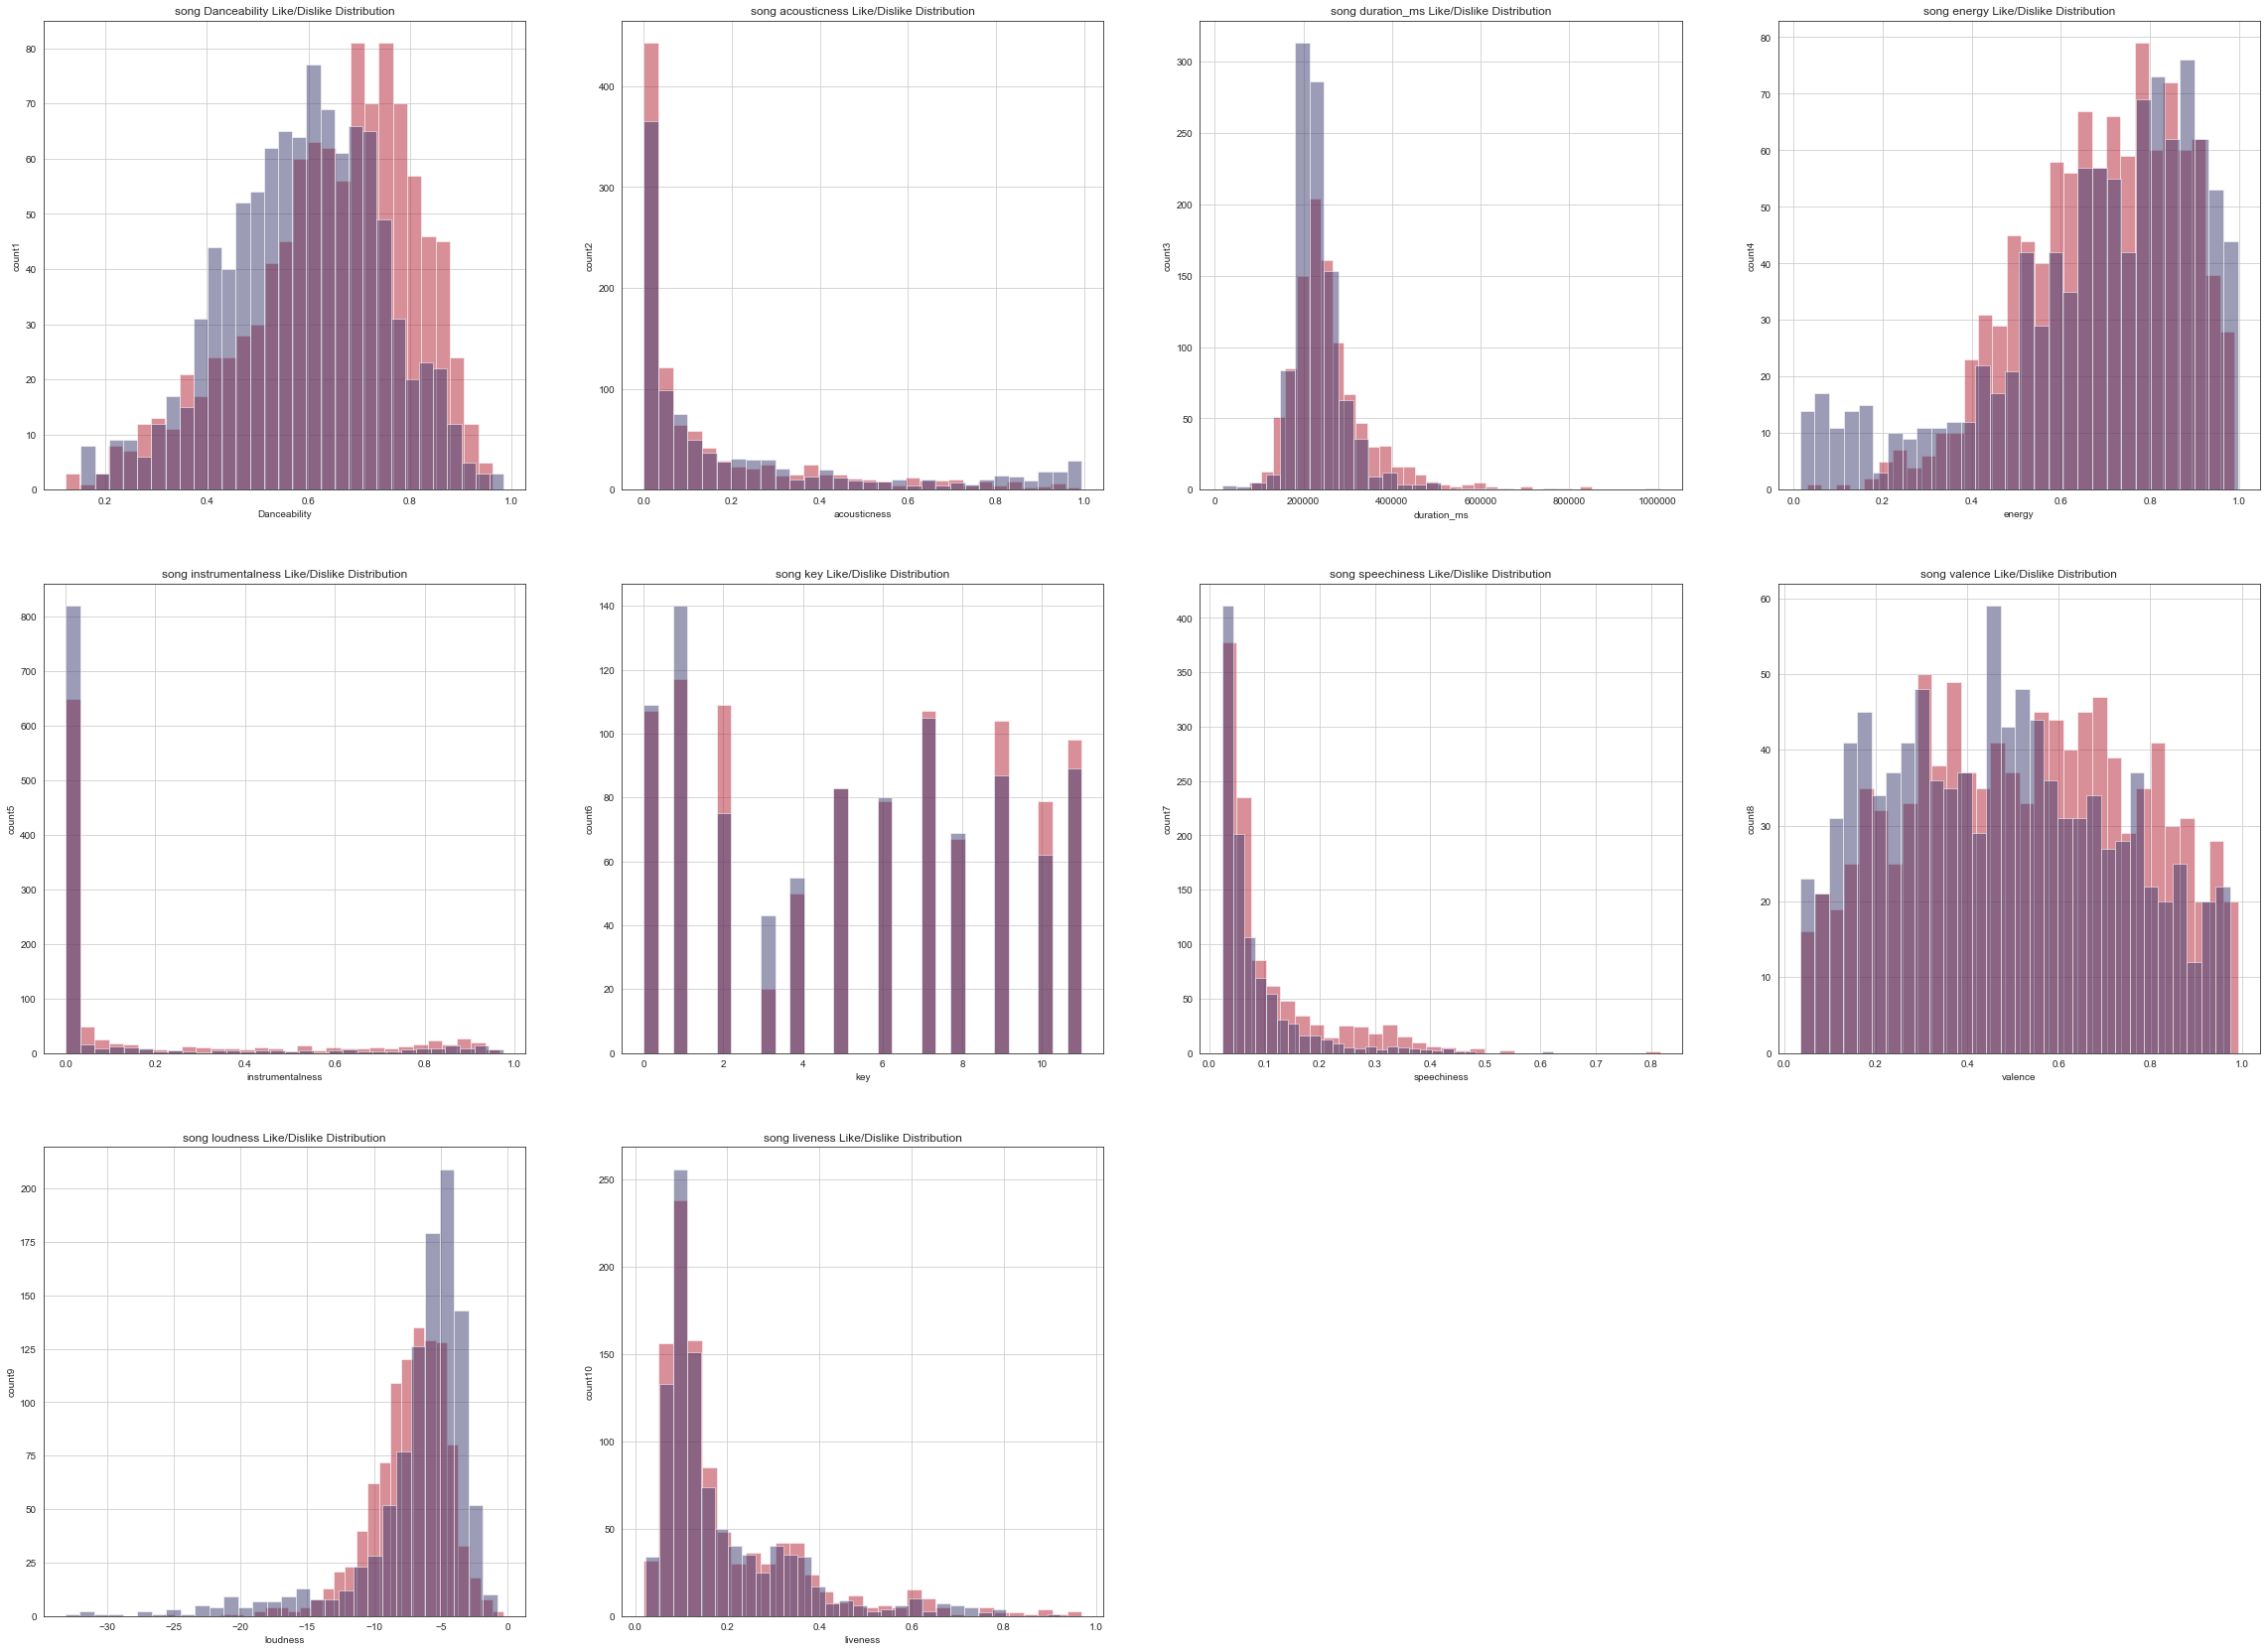

In [12]:
fig2 = plt.figure(figsize=(40,40))

#Danceability
a3 = fig2.add_subplot(441)
a3.set_xlabel('Danceability')
a3.set_ylabel('count1')
a3.set_title("song Danceability Like/Dislike Distribution")
pos_danceability.hist(alpha=0.5, bins=30)
a4 = fig2.add_subplot(441)
neg_danceability.hist(alpha = 0.5, bins=30)

#acousticness
a3 = fig2.add_subplot(442)
a3.set_xlabel('acousticness')
a3.set_ylabel('count2')
a3.set_title("song acousticness Like/Dislike Distribution")
pos_acousticness.hist(alpha=0.5, bins=30)
a4 = fig2.add_subplot(442)
neg_acousticness.hist(alpha = 0.5, bins=30)

#duration_ms
a3 = fig2.add_subplot(443)
a3.set_xlabel('duration_ms')
a3.set_ylabel('count3')
a3.set_title("song duration_ms Like/Dislike Distribution")
pos_duration_ms.hist(alpha=0.5, bins=30)
a4 = fig2.add_subplot(443)
neg_duration_ms.hist(alpha = 0.5, bins=30)

#energy
a3 = fig2.add_subplot(444)
a3.set_xlabel('energy')
a3.set_ylabel('count4')
a3.set_title("song energy Like/Dislike Distribution")
pos_energy.hist(alpha=0.5, bins=30)
a4 = fig2.add_subplot(444)
neg_energy.hist(alpha = 0.5, bins=30)

#instrumentalness
a3 = fig2.add_subplot(445)
a3.set_xlabel('instrumentalness')
a3.set_ylabel('count5')
a3.set_title("song instrumentalness Like/Dislike Distribution")
pos_instrumentalness.hist(alpha=0.5, bins=30)
a4 = fig2.add_subplot(445)
neg_instrumentalness.hist(alpha = 0.5, bins=30)

#key
a3 = fig2.add_subplot(446)
a3.set_xlabel('key')
a3.set_ylabel('count6')
a3.set_title("song key Like/Dislike Distribution")
pos_key.hist(alpha=0.5, bins=30)
a4 = fig2.add_subplot(446)
neg_key.hist(alpha = 0.5, bins=30)

#speechiness
a3 = fig2.add_subplot(447)
a3.set_xlabel('speechiness')
a3.set_ylabel('count7')
a3.set_title("song speechiness Like/Dislike Distribution")
pos_speechiness.hist(alpha=0.5, bins=30)
a4 = fig2.add_subplot(447)
neg_speechiness.hist(alpha = 0.5, bins=30)

#valence
a3 = fig2.add_subplot(448)
a3.set_xlabel('valence')
a3.set_ylabel('count8')
a3.set_title("song valence Like/Dislike Distribution")
pos_valence.hist(alpha=0.5, bins=30)
a4 = fig2.add_subplot(448)
neg_valence.hist(alpha = 0.5, bins=30)

#loudness
a3 = fig2.add_subplot(449)
a3.set_xlabel('loudness')
a3.set_ylabel('count9')
a3.set_title("song loudness Like/Dislike Distribution")
pos_loudness.hist(alpha=0.5, bins=30)
a4 = fig2.add_subplot(449)
neg_loudness.hist(alpha = 0.5, bins=30)

#liveness
a3 = fig2.add_subplot(4,4,10)
a3.set_xlabel('liveness')
a3.set_ylabel('count10')
a3.set_title("song liveness Like/Dislike Distribution")
pos_liveness.hist(alpha=0.5, bins=30)
a4 = fig2.add_subplot(4,4,10)
neg_liveness.hist(alpha = 0.5, bins=30)



In [13]:
c = DecisionTreeClassifier(min_samples_split=2)

In [14]:
features = ["danceability", "loudness", "key","liveness","tempo","speechiness","instrumentalness","valence","duration_ms","acousticness","energy"]

In [15]:
x_train = train[features]
y_train = train["target"]

x_test = test[features]
y_test = test["target"]



In [16]:
dt = c.fit(x_train,y_train)

In [17]:
from scipy.misc import imread

In [18]:
import imageio

In [19]:
!pwd

'pwd' is not recognized as an internal or external command,
operable program or batch file.


In [20]:
def show_tree(tree, features, path):
    f = io.StringIO()
    export_graphviz(tree,out_file=f,feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)

    img = misc.imread(path)
    plt.rcParams["figure.figsize"] = (150,150)
    plt.imshow(img)
    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


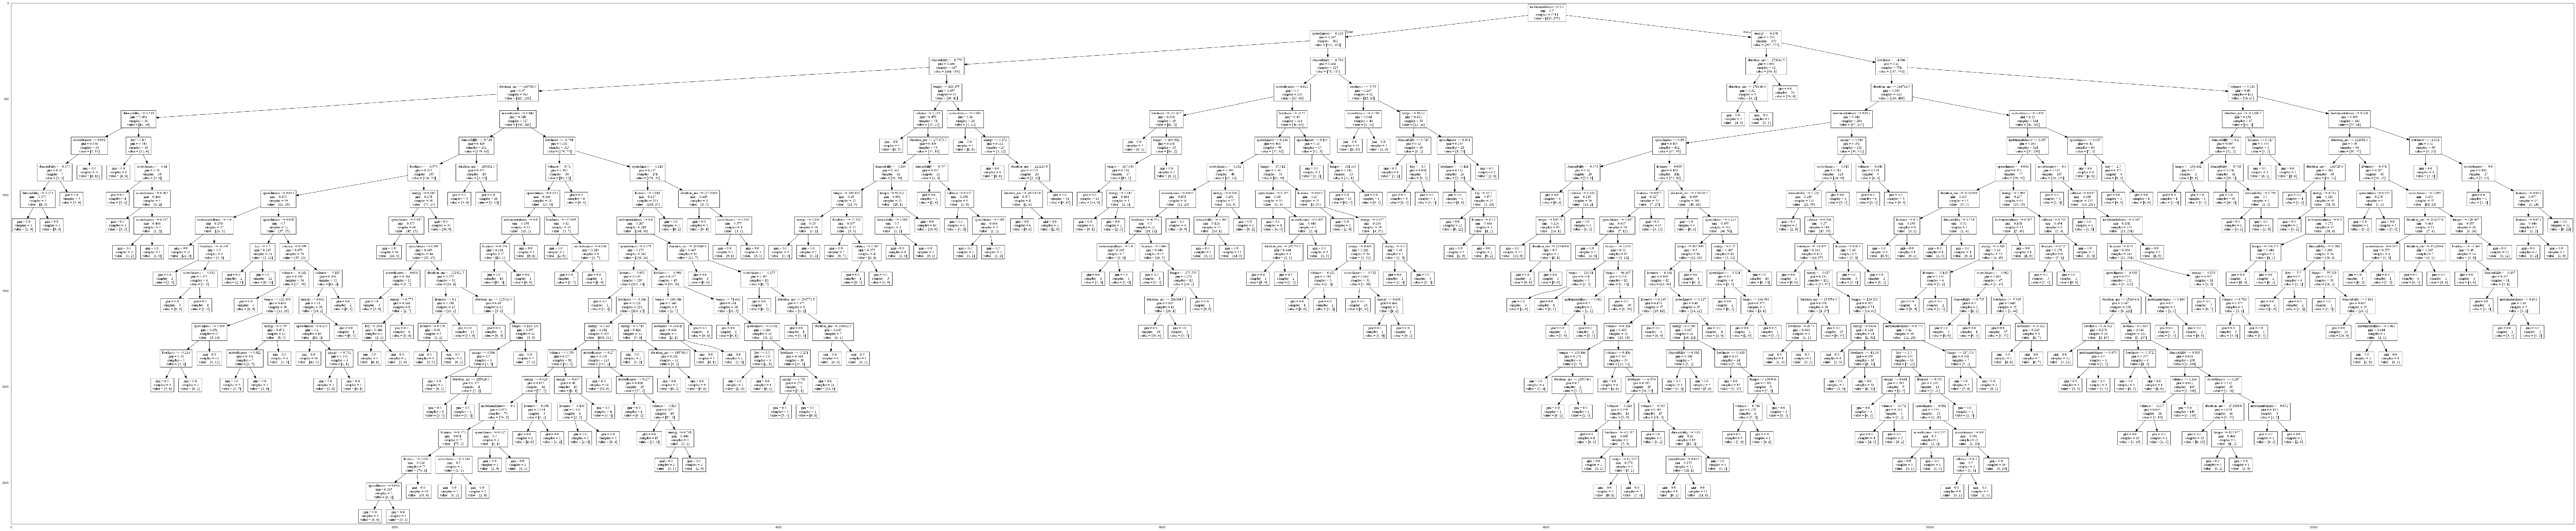

In [21]:
show_tree(dt,features,'dec_tree_01.png')

In [22]:
import scipy
from scipy import misc

scipy.misc.imread

<function numpy.lib.utils._Deprecate.__call__.<locals>.newfunc(*args, **kwds)>

In [23]:
y_pred = c.predict(x_test)

In [24]:
y_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,

In [25]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test,y_pred)*100


In [26]:
print("Accuracy using Decision Tree_001:", round(score,1),"%")

Accuracy using Decision Tree_001: 69.6 %
